# Procesado de imagenes con OpenCV - ejercicios modulo 2 
## 4. Analisis de imagenes

## &emsp;&emsp;4.1 Crear una rutina para separar las imagenes en los diferentes colores y mostrar sus histogramas

## &emsp;&emsp;4.2 Elige una imagen que tengas y duplica un elemento de la imagen

## 5. Mejora y manipulacion de imagenes
## &emsp;&emsp;5.1 Buscar una imagen que tenga poco contraste y aplicarle diferentes equalizaciones
## &emsp;&emsp;5.2 Incluye 3 kernels adicionales al ejercicio de filtros
## &emsp;&emsp;5.3 Coge una imagen que te guste y ponle ruido. Luego utiliza un filtro para quitarselo
## &emsp;&emsp;5.4 Crea una imagen de comic con un animal que te guste

## BONUS1: Investiga nuevas formas de cambiar estilos de imagenes mediante diferentes filtros y thresholding
## BONUS2: Define tu propio ejercicio que te parezca interesante y propon una solución


## 4.1 Crear una rutina para separar las imagenes en los diferentes colores y mostrar sus histogramas

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Antes vamos a crear la función histogram: 

def histograma(img, text_title="Histograma"):
    
    hist_gray = cv2.calcHist([cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)], [0], None, [256],[0,256])#imagen, canal, mascara,max, rango
    hist_blue = cv2.calcHist([img], [0], None, [256],[0,256])
    hist_green = cv2.calcHist([img],[1],None,[256],[0,256])
    hist_red = cv2.calcHist([img],[2],None,[256], [0,256])
    
    plt.title(text_title)
    plt.ylabel('Number of pixels')
    plt.xlabel('Value of pixels')
    
    if(hist_gray.sum()>hist_gray.max()):
        plt.plot(hist_gray,color='gray')
    if(hist_blue.sum()>hist_blue.max()):
        plt.plot(hist_blue, color='blue')
    if(hist_green.sum()>hist_green.max()):
        plt.plot(hist_green, color='green')
    if(hist_red.sum()>hist_red.max()):
        plt.plot(hist_red, color='red')

2
3


<Figure size 1152x720 with 0 Axes>

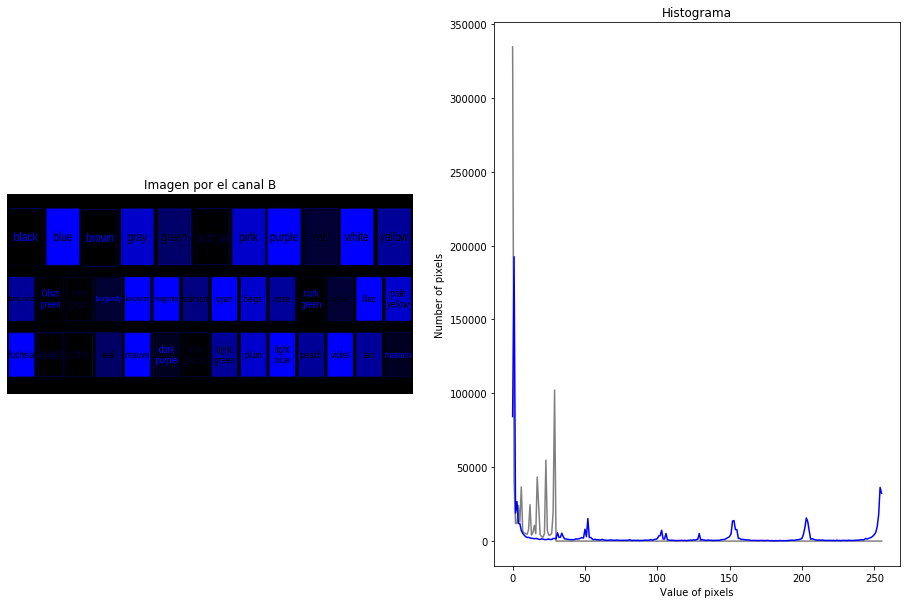

3
4


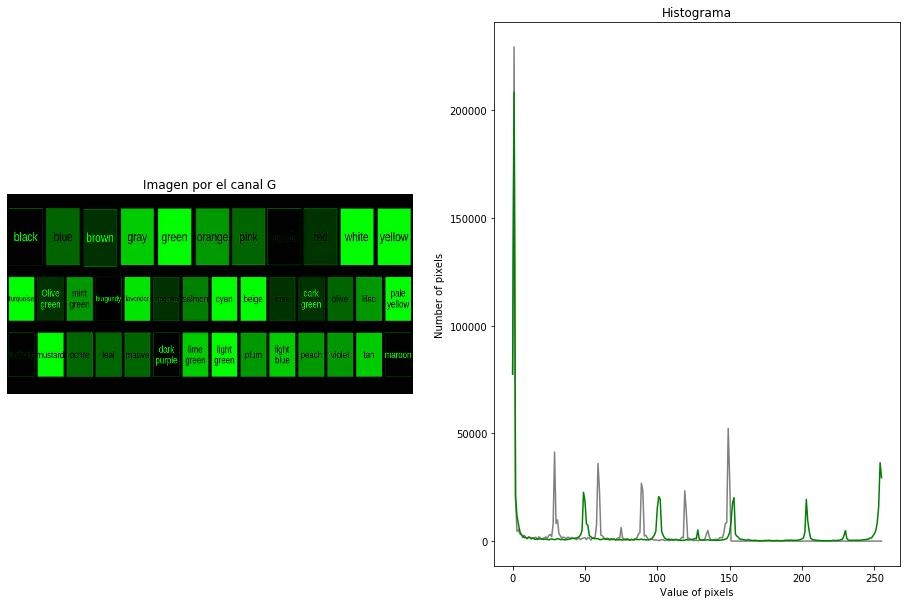

4
5


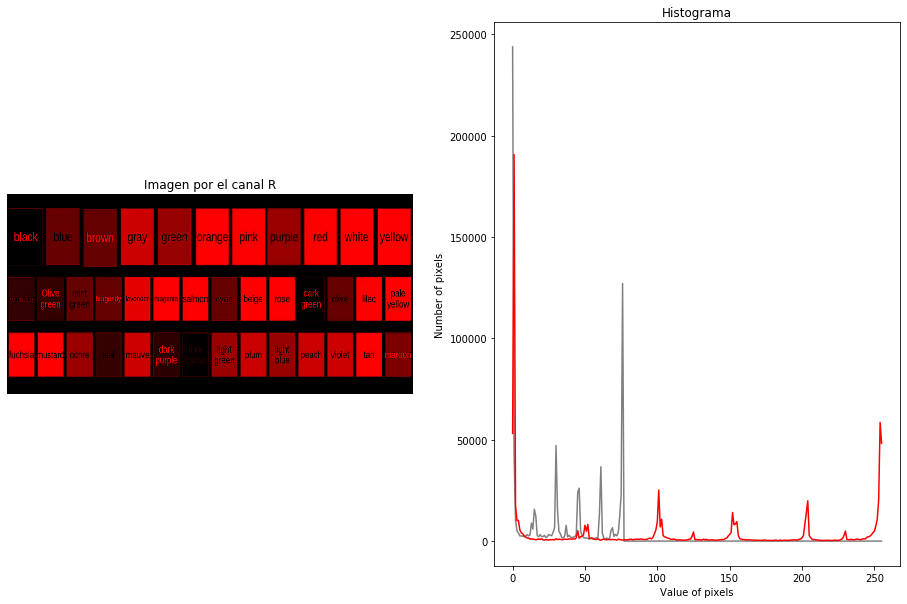

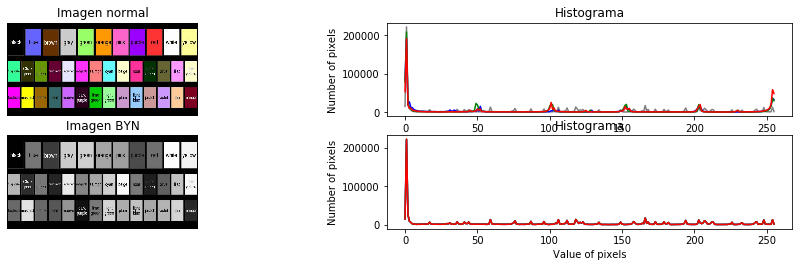

In [3]:

# Se recomienda: 
# Crear una subrutina que tenga como:


# MODO DOS DE HACERLO
# Leemos imagen
img = cv2.imread("colors.jpg")

fig = plt.figure(figsize=(16,10))


#Copiar la imagen
#new_img = img.copy()
#Rojo - cojo la copia - 0, G, B
# Esto para los 3 colores
canales = {0:'B',1:'G',2:'R'}
for indexDeCadaCanal in range(3):
    # Creamos un array de zeros de las mismas dimensiones que la imagen
    new_image = np.zeros( shape =img.shape, dtype=np.uint8)
    # Ahora asignamos al canal los nºs que hay en nuestra imagen en ese canal
    new_image[:,:,indexDeCadaCanal] = img[:,:,indexDeCadaCanal]
    # Y así ya tendríamos la imagen con ese canal.
    # Ahora la mostramos
    fig = plt.figure(figsize=(16,10))
    fig.add_subplot(1,2,1)
    print((indexDeCadaCanal)+2)
    new_image_rgb = cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB)
    plt.imshow(new_image_rgb)
    plt.title('Imagen por el canal '+ canales[indexDeCadaCanal])
    plt.axis('off')
    # Y ahora mostramos el plot:
    fig.add_subplot(1,2,2)
    print((indexDeCadaCanal)+3)
    histograma(new_image)
    plt.show()
    
    
    
# La ponemos en blanco y negro
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


# Creamos un histograma extrallendo el numpy R -> R, B->B, G->G

# Un histograma tiene una lista de inputs, asi que creamos una lista: 
# Lista input lista histograma [R.reshape,G.reshape,B.reshape]  # Con reshape podemos darle las dimensiones que queremos con solo una dimensión. 

fig = plt.figure(figsize=(16,10))
fig.add_subplot(5,2,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Imagen normal')
plt.axis('off')
fig.add_subplot(5,2,2)
histograma(img)

fig.add_subplot(5,2,3)
plt.imshow(img_gray, cmap='gray')
plt.title('Imagen BYN')
plt.axis('off')
fig.add_subplot(5,2,4)
histograma(cv2.cvtColor(img_gray,cv2.COLOR_GRAY2BGR))

plt.show()



# MODOS UNO DE HACERLO: 
# Entrada un objeto imagen de numpy 
# Salida un objeto imagen con la imagen original, los 3 canales de RGB y blanco y negro y los respectivos histogramas

# Separar la imagen en los 3 difererntes canales RGB ademas de la imagen en blanco y negro

# Incluir otros graficos en matrplotlib en la rutina que se estimen que aportan informacion (histrograma, por ejemplo, algun otro?)

# Identificar que se podria poner en una funcion generica y escribir dichas funciones

# Reducir las lineas de codigo 

# Comentar el codigo donde haga falta

# Aplicarlo a dos imagenes - una blanco y negro y otra en color


(323, 512, 3)


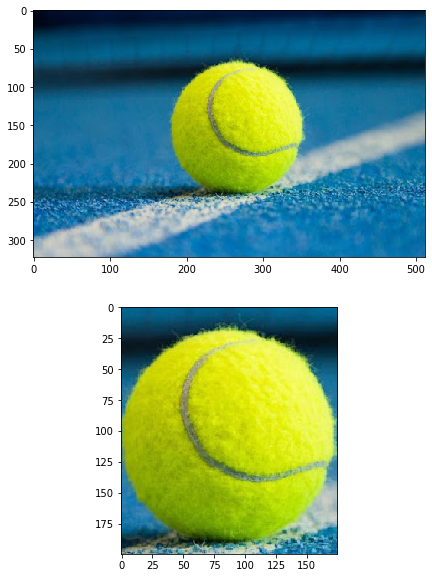

(200, 175, 3)


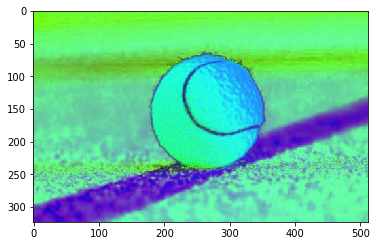

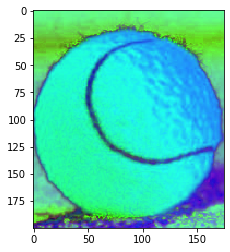

[ 32 248 218] [ 31 255 214] [ 32 173 249] [ 34 250 222] [ 39 242 139] [ 40 255 127] [ 74 175  32] [ 37 148 236] [ 30 165 246] [ 40 141 152]


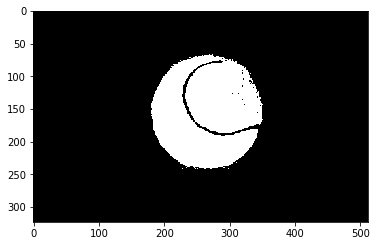

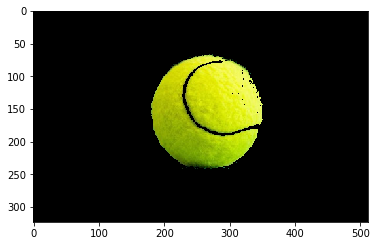

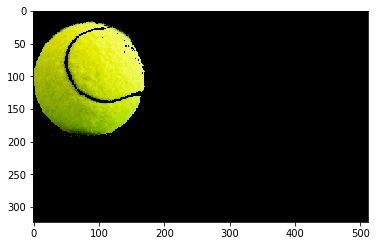

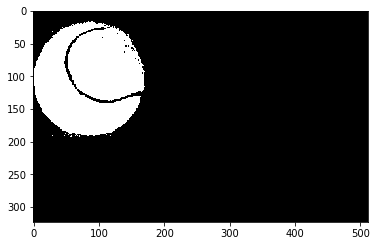

Mask movida negativa


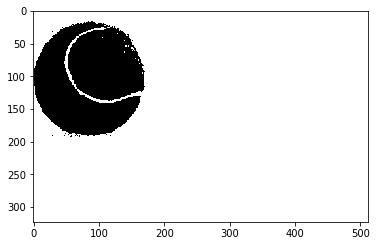

Fondo Mask movida negativa


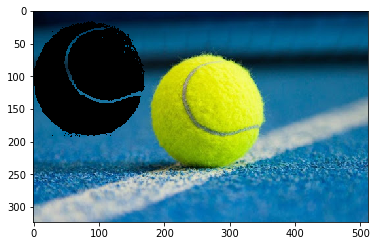

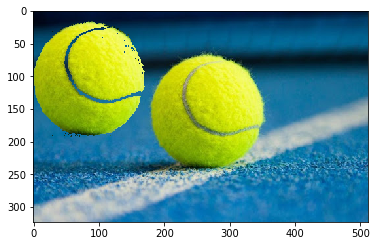

In [11]:
# Se recomienda: 
# Utilizar una imagen que os vaya bien
img = cv2.imread('tenis.jpg')
fig = plt.figure(figsize=(18,10))
fig.add_subplot(2,1,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
print(img.shape)

# Identificar el elemento caracteristico y su color
fig.add_subplot(2,1,2)
elem = img[50:250,180:355,:]
plt.imshow(cv2.cvtColor(elem,cv2.COLOR_BGR2RGB))
plt.show()
print(elem.shape)

# Transformar el color de BGR a HSV
# Transformar la imagen a HSV
img_HSV = cv2.cvtColor( img, cv2.COLOR_BGR2HSV)
plt.imshow(img_HSV)
plt.show()
elem_HSV = img_HSV[50:250,180:355,:] # 200, 175, :
plt.imshow(elem_HSV)
plt.show()
print(elem_HSV[100,100,:],elem_HSV[50, 50,:],elem_HSV[75,150,:],elem_HSV[145,100,:], elem_HSV[175,50,:], elem_HSV[180,70,:], elem_HSV[25,125,:], elem_HSV[50,150,:], elem_HSV[50,125,:], elem_HSV[140,100,:]) 
    # [ 32 248 218] [ 31 255 214] [ 32 173 249] [ 34 250 222] [ 39 242 139] [ 39 248 175] [ 40 255 127] [ 74 175  32][ 37 148 236][ 30 165 246] [40 141 152]

 # Definimos el rango: 
lower = np.array([25,140,27]) #[30,141,32]
upper = np.array([79,260,254]) # [74,255,249]
# Lanzar el thresholding para generar el map que se va a filtrar
mask = cv2.inRange(img_HSV, lower, upper)
plt.imshow(mask,cmap='gray')
plt.show()

# Extraer el elemento con el mapa generado 
maskPuesta= cv2.bitwise_and(img, img, mask= mask)
plt.imshow(cv2.cvtColor(maskPuesta, cv2.COLOR_BGR2RGB))
plt.show()

# Mover el elemento con numpy y sumarlo a la imagen con cv2.add()
movido = np.zeros(shape= maskPuesta.shape, dtype=np.uint8)
movido[0:200,0:175,:] = maskPuesta[50:250,180:355,:]

plt.imshow(cv2.cvtColor(movido, cv2.COLOR_BGR2RGB))
plt.show()

# Creamos una maskara movida: 
mask_movida = np.zeros(shape= mask.shape, dtype=np.uint8)
mask_movida[0:200,0:175] = mask[50:250,180:355]
plt.imshow(mask_movida,cmap='gray')
plt.show()

# Y hacemos una maskara movida inversa / maskina negativa 
mask_movida_neg = cv2.bitwise_not(mask_movida)
# Me quedo con el fondo: 
movida_neg = cv2.bitwise_and(img, img, mask = mask_movida_neg)

print("Mask movida negativa")
plt.imshow(cv2.cvtColor(mask_movida_neg, cv2.COLOR_BGR2RGB))
plt.show()
print("Fondo Mask movida negativa")
plt.imshow(cv2.cvtColor(movida_neg, cv2.COLOR_BGR2RGB))
plt.show()

figuraFinal = cv2.add(movida_neg, movido)
#figuraFinal = cv2.addWeighted(img, 0.5, movido, 0.5, 0) # img*0.5 + movido*0.5+0
plt.imshow(cv2.cvtColor(figuraFinal, cv2.COLOR_BGR2RGB))
plt.show()
# Incluir tu logo personal en la parte inferior derecha de la imagen


## 4.2 Elige una imagen que tengas y duplica un elemento de la imagen

## 5.1 Buscar una imagen que tenga poco contraste y aplicarle diferentes ecualizaciones

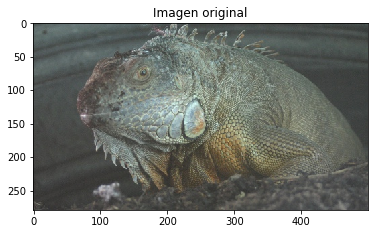

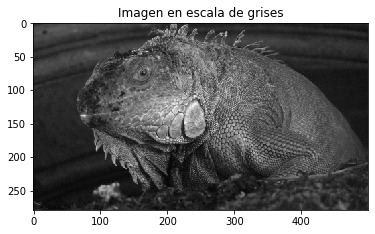

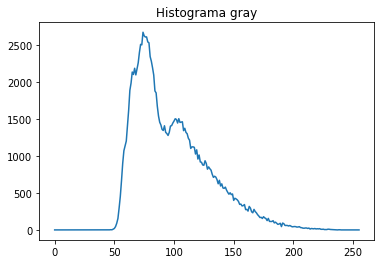

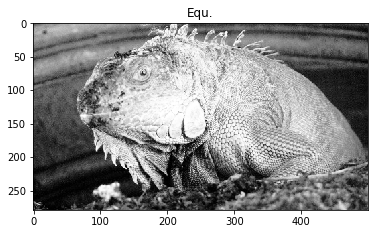

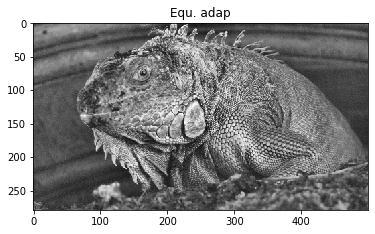

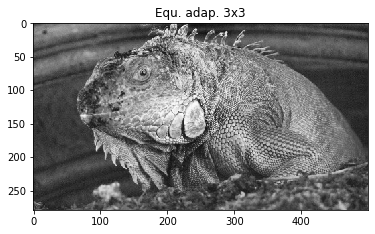

True

In [21]:
# Se recomienda: 
# Identifica una imagen que tenga poco contraste
img = cv2.imread("pocoContraste.jpg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Imagen original')
plt.show()
# Transformala a escala de grises
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap = 'gray')
plt.title('Imagen en escala de grises')
plt.show()
# Pinta un histograma de la escala de grises 
plt.plot(cv2.calcHist([img_gray],[0],None,[256],[0,256]))
plt.title('Histograma gray')
plt.show()
# Aplicale la ecualizacion estandar y la adaptativa como en el ejercicio
    # Creamos clahe: 
clahe = cv2.createCLAHE(clipLimit = 2.0, tileGridSize = (8,8))
    # Aplicamos las ecualizaciones: 
img_eq=cv2.equalizeHist(img_gray) #Estandar
img_eq_adap = clahe.apply(img_gray)
# Investiga que diferentes parametros tiene la ecualizacion adaptativa 
    # tileGridSize = Bloques en los que se divide la imagen, por defecto es 8x8 y se aplica la ecualización estandar a cada región
    # clipLimit = Evita el ruido limitando el contraste
# Genera un cuadrante de 3x3 con los dos parametros predominantes y muestra el efecto sobre la imagen en escala de grises
clahe3x3 = cv2.createCLAHE(clipLimit = 2.0, tileGridSize = (3,3))
img_eq_adap_3x3 = clahe3x3.apply(img_gray)
plt.imshow(cv2.cvtColor(img_eq, cv2.COLOR_GRAY2RGB))
plt.title('Equ.')
plt.show()
plt.imshow(cv2.cvtColor(img_eq_adap, cv2.COLOR_GRAY2RGB))
plt.title('Equ. adap')
plt.show()
plt.imshow(cv2.cvtColor(img_eq_adap_3x3, cv2.COLOR_GRAY2RGB))
plt.title('Equ. adap. 3x3')
plt.show()
# Hay en internet / la literatura otras formas de ecualizacion? Cuales son las ventajas e inconvenientes?

# Busca la mejor ecualizacion para tu imagen, compara el fichero con el original y guardalo para el siguiente ejercicio
cv2.imwrite("pocoContraste_eq_adap.jpg",img_eq_adap )

## 5.2 Incluye 3 kernels adicionales al ejercicio de filtros

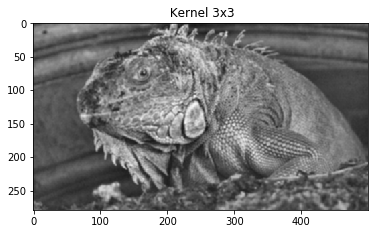

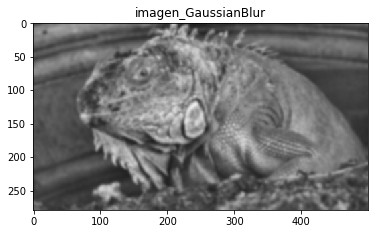

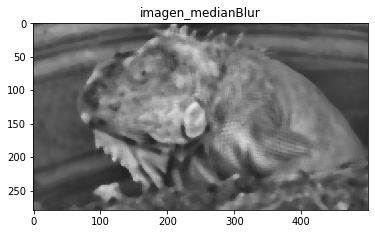

In [25]:
# Se recomienda: 
# Revisa que tipo de kernels hemos estudiado en el ejericio guiado
# Aplicalos a la imagen del ejercicio 5.1
img_eq_adap = cv2.imread("pocoContraste_eq_adap.jpg")
                    
kernel_3x3 = np.ones((3,3), np.float32)/9 # Kernel creado por nosotros
imagen_kernel_3x3 = cv2.filter2D(img_eq_adap, -1, kernel_3x3)  
plt.imshow(cv2.cvtColor(imagen_kernel_3x3, cv2.COLOR_BGR2RGB))
plt.title(' Kernel 3x3')
plt.show()  
# Otros kernels                         
imagen_GaussianBlur = cv2.GaussianBlur(img_eq_adap, (9,9),0)
plt.imshow(cv2.cvtColor(imagen_GaussianBlur, cv2.COLOR_BGR2RGB))
plt.title('imagen_GaussianBlur') 
plt.show()
imagen_medianBlur = cv2.medianBlur(img_eq_adap, 9)
plt.imshow(cv2.cvtColor(imagen_medianBlur, cv2.COLOR_BGR2RGB))
plt.title('imagen_medianBlur') 
plt.show()
# Para que recomendarias cada uno de los kernels?
    # kernel_3x3 solo para bajar un poco el contraste
    # GaussianBlur para detectar bordes
    # MedianBlur para ...
# Busca otro 3 kernels en la literatura, revisa para que son adecuados e implementalos


## 5.3 Coge una imagen que te guste y ponle ruido. Luego utiliza un filtro para quitarselo

In [ ]:
# Se recomienda: 
# Identifica una imagen que quieras utilizar

# Genera una matriz de numpy con ruido (tanto positivo como negativo)

# Aplicale la matriz a tu foto y muestrala. Cual es el nivel de ruido optimo

# Aplicale algun filtro para quitarle el ruido

# Muestra la imagen original, la con ruido y la filtrada

## 5.4 Crea una imagen de comic con un animal que te guste

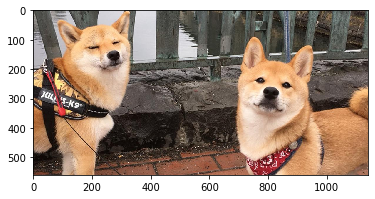

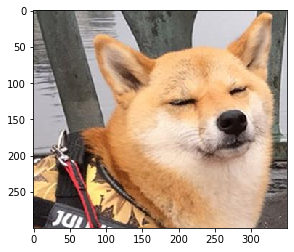

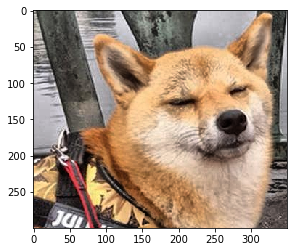

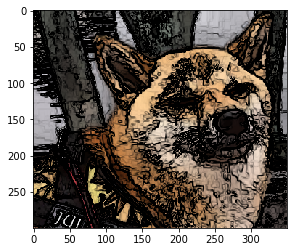

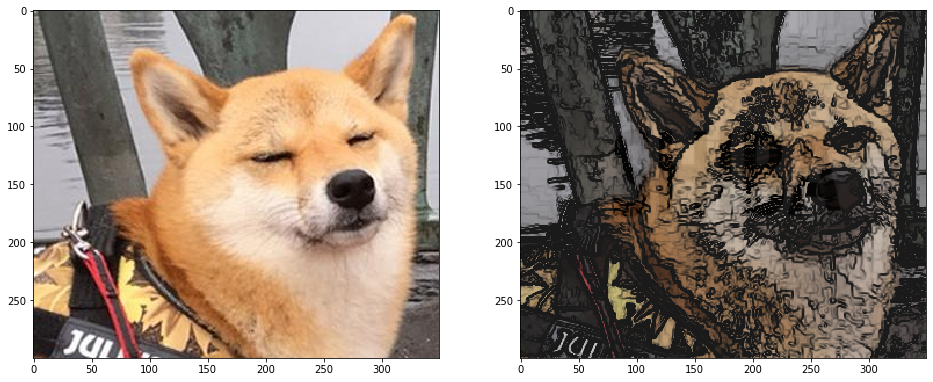

In [57]:
# Se recomienda: 
# Busca la imagen del animal que quieras hacer el comic. Fijate no solo en el animal, pero tambien en le entorno
img = cv2.imread('shibas.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
# Recortala 
img_re = img[0:300, 0:350, :]
plt.imshow(cv2.cvtColor(img_re, cv2.COLOR_BGR2RGB))
plt.show()
# Pasale los filtros que consideres para mejorarla
    # La voy a equalizar (adapt.) primero : 
    # 1º - La paso a HSV: 
img_re_hsv = cv2.cvtColor(img_re, cv2.COLOR_BGR2HSV)
    # 2º - Separo los conales con split y creo las listas
channels = cv2.split(img_re_hsv)
new_cha_adap = []
    # 3º - Filtro adaptativo:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    # 4º - Solo ecualizo el canal V: 
new_cha_adap.append(channels[0])
new_cha_adap.append(channels[1])
new_cha_adap.append(clahe.apply(channels[2]))
    # 5º - Merge: 
img_re_hsv_eq = cv2.merge(new_cha_adap)
    # 6º - La pasamos de nuevo a BGR
img_re_eq = cv2.cvtColor(img_re_hsv_eq, cv2.COLOR_HSV2BGR)
plt.imshow(cv2.cvtColor(img_re_eq, cv2.COLOR_BGR2RGB))
plt.show()


# Aplica el filtro
img_sty = cv2.stylization(img_re_eq, sigma_s=60, sigma_r=0.1)
plt.imshow(cv2.cvtColor(img_sty, cv2.COLOR_BGR2RGB))
plt.show()

# Genera una marca de agua
img_logo = cv2.imread('shibaLogo.jpg')
if(img_logo.shape!=img_sty.shape):
    img_logo = cv2.resize(img_logo,(img_sty.shape[1],img_sty.shape[0])) 
img_con_marca = cv2.addWeighted(img_sty,0.7,img_logo,0.1,0)
# Dibuja el antes y el despues y guarda el resultado en un fichero
fig = plt.figure(figsize = (16,10))
fig.add_subplot(1,2,1)
plt.imshow(cv2.cvtColor(img_re, cv2.COLOR_BGR2RGB))
fig.add_subplot(1,2,2)
plt.imshow(cv2.cvtColor(img_con_marca, cv2.COLOR_BGR2RGB))
plt.show()




## BONUS1: Investiga nuevas formas de cambiar estilos de imagenes mediante diferentes filtros y thresholding

In [15]:
# Busca otras formas de filtrar, segmentar, triangular, modificar imagenes. 
# Intenta ver como mejor combinarlas para conseguir un estilo propio y original

## BONUS2: Define tu propio ejercicio que te parezca interesante y propon una solución

In [8]:
# Piensa en un ejercicio que sea util para profundizar en temas que se han tratado en este modulo